In [ ]:
import requests

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/train.csv')



In [ ]:
df.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
!pip install imblearn
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
df.head(5)

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [ ]:
df.tail(5)

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
2865,47852,Manhattan,40.74316,-73.98038,Private room,400,2,0,NaN,270096906,1,1
2866,21978,Manhattan,40.73523,-73.99465,Private room,180,3,2,0.07,97266110,1,1
2867,23485,Manhattan,40.76619,-73.98987,Entire home/apt,179,3,17,0.67,10903067,1,0
2868,16757,Manhattan,40.74637,-73.97207,Private room,200,30,0,NaN,2856748,49,1
2869,2355,Manhattan,40.79208,-73.96482,Shared room,1000,30,24,0.33,836168,11,1


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2870 non-null   int64  
 1   region               2870 non-null   object 
 2   latitude             2870 non-null   float64
 3   longitude            2870 non-null   float64
 4   accommodation_type   2870 non-null   object 
 5   cost                 2870 non-null   int64  
 6   minimum_nights       2870 non-null   int64  
 7   number_of_reviews    2870 non-null   int64  
 8   reviews_per_month    2194 non-null   float64
 9   owner_id             2870 non-null   int64  
 10  owned_hotels         2870 non-null   int64  
 11  yearly_availability  2870 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 269.2+ KB


In [ ]:
df.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

In [ ]:
len(df)

2870

In [ ]:
len(df.columns)

12

In [ ]:
df.shape

(2870, 12)

**Describe helps in Analyzing the data at a glance** 

In [ ]:
df.describe()


,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


**Checking for Null values in data, because either these are filled with an appropriate value with respect to each column or completely removed from the dataset, depending on a given use case** 

In [ ]:
df.replace('', np.nan, inplace=True)
df.isnull().sum()

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

**Unique Values in each attribute also helps explore the structure of the dataset**

In [ ]:
df.nunique()

id                     2870
region                    5
latitude               2647
longitude              2550
accommodation_type        3
cost                    330
minimum_nights           53
number_of_reviews       160
reviews_per_month       419
owner_id               2371
owned_hotels             40
yearly_availability       2
dtype: int64

**But never forgets about the most important attribute of any given dataset, which can be a label in a classification problem or a continuous value in regression analysis. In clustering it depends on the use case that which attributes are important to look around with.**

In [ ]:
df['yearly_availability'].value_counts()

0    1439
1    1431
Name: yearly_availability, dtype: int64

In [ ]:
colsToObserve = df.columns[(df.nunique() <= 10)]

**When an attribute has less number of Unique Values it is always a good criteria to look at them keenly to know more about the structure as a whole and how the other attributes are behaving around these small buckets**

In [ ]:
for col in colsToObserve:
  if len(df[col].unique())>1:
    print(col + " : ")
    print(df[col].unique())

region : 
['Manhattan' 'Brooklyn' 'Queens' 'Bronx' 'Staten Island']
accommodation_type : 
['Entire home/apt' 'Private room' 'Shared room']
yearly_availability : 
[0 1]


# **Question 2: Plots, Histograms, Box Plots, Correlation Matrix and Hypothesis about the Structure of Data, Deep Diving to find correlation and causation**

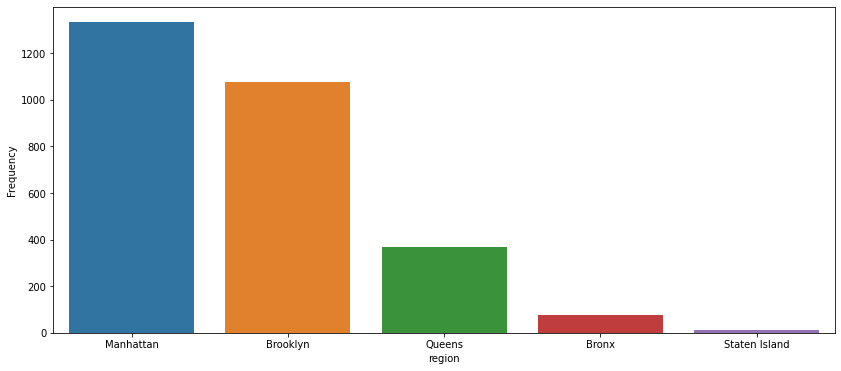

In [ ]:
import seaborn as sns



e=pd.DataFrame(df.region.value_counts()).reset_index(drop=False)
e.columns=['region','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="region", y="Frequency", data=e) # draw barplot

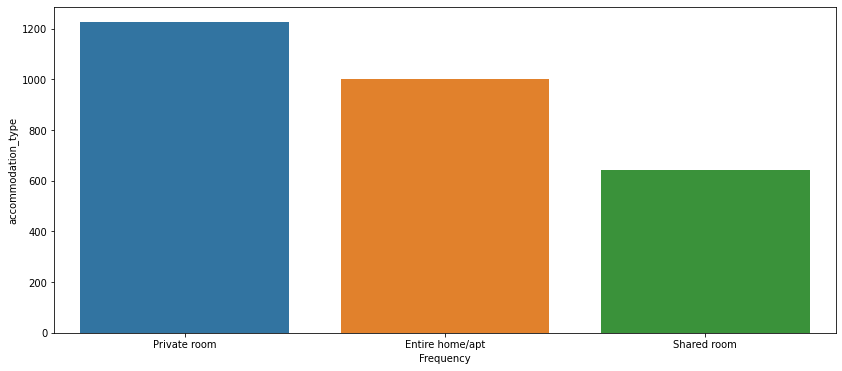

In [ ]:
e=pd.DataFrame(df.accommodation_type.value_counts()).reset_index(drop=False)
e.columns=['Frequency', 'accommodation_type'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="Frequency", y="accommodation_type", data=e) # draw barplot

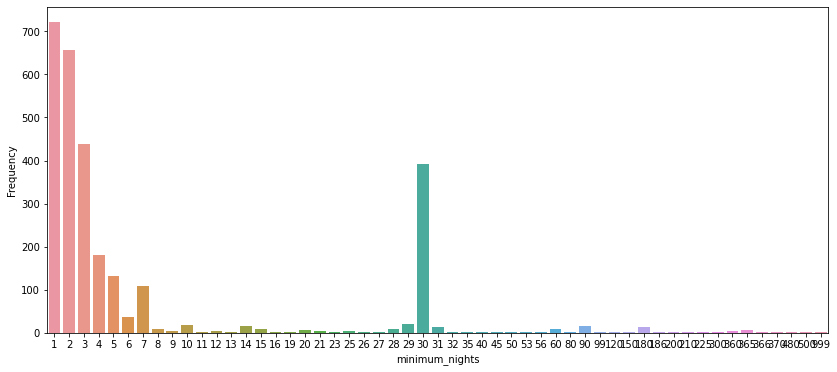

In [ ]:
e=pd.DataFrame(df.minimum_nights.value_counts()).reset_index(drop=False)
e.columns=['minimum_nights','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="minimum_nights", y="Frequency", data=e) # draw barplot

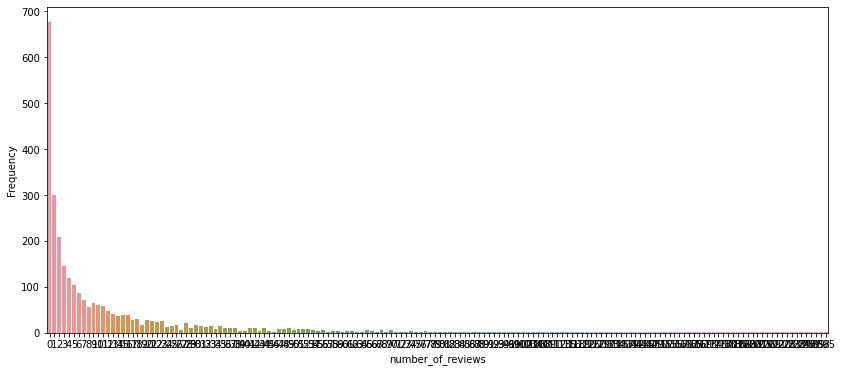

In [ ]:
e=pd.DataFrame(df.number_of_reviews.value_counts()).reset_index(drop=False)
e.columns=['number_of_reviews','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="number_of_reviews", y="Frequency", data=e) # draw barplot

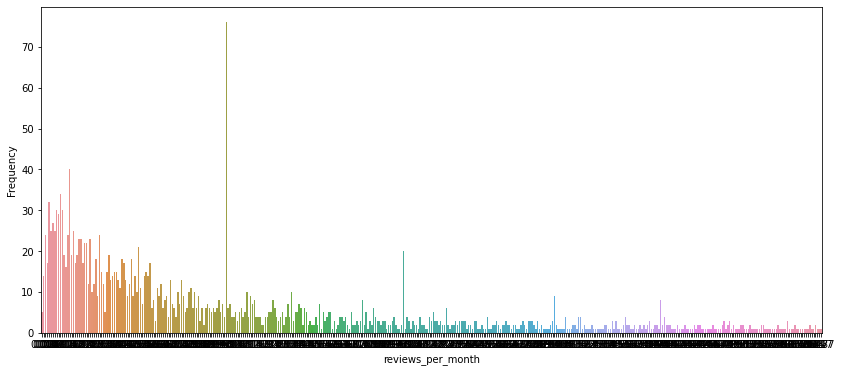

In [ ]:
e=pd.DataFrame(df.reviews_per_month.value_counts()).reset_index(drop=False)
e.columns=['reviews_per_month','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="reviews_per_month", y="Frequency", data=e) # draw barplot

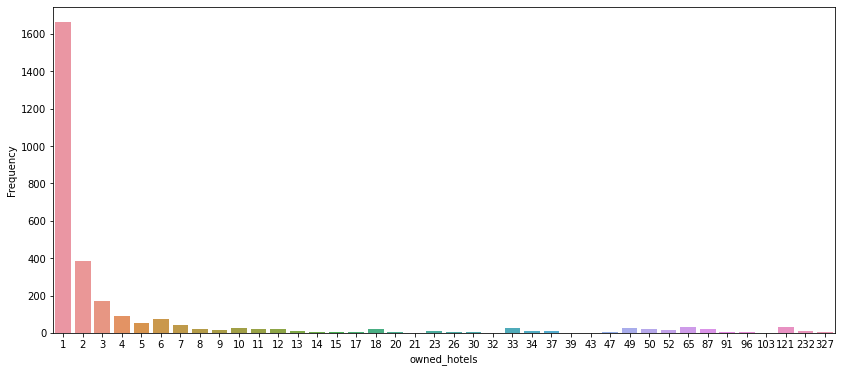

In [ ]:
e=pd.DataFrame(df.owned_hotels.value_counts()).reset_index(drop=False)
e.columns=['owned_hotels','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="owned_hotels", y="Frequency", data=e) # draw barplot

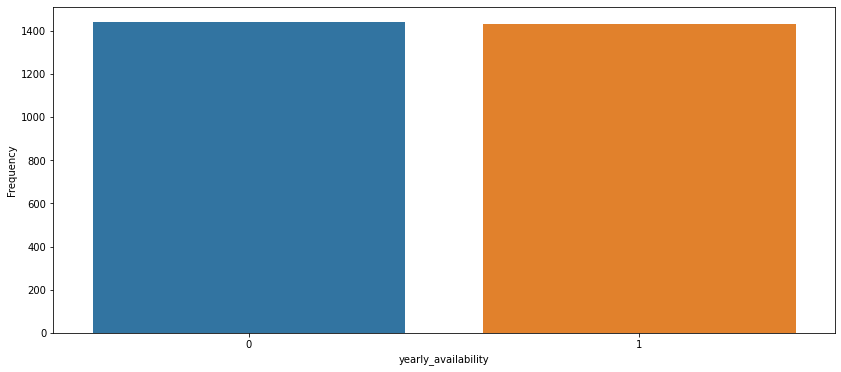

In [ ]:
e=pd.DataFrame(df.yearly_availability.value_counts()).reset_index(drop=False)
e.columns=['yearly_availability','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="yearly_availability", y="Frequency", data=e) # draw barplot

In [ ]:
df.groupby(['id']).count()

,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
id,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,0,1,1,1
10,1,1,1,1,1,1,1,1,1,1,1
22,1,1,1,1,1,1,1,1,1,1,1
38,1,1,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
48861,1,1,1,1,1,1,1,0,1,1,1
48864,1,1,1,1,1,1,1,0,1,1,1
48880,1,1,1,1,1,1,1,0,1,1,1


In [ ]:
df.groupby(['owner_id']).count()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability
owner_id,,,,,,,,,,,
2787,1,1,1,1,1,1,1,1,1,1,1
2845,1,1,1,1,1,1,1,1,1,1,1
3415,1,1,1,1,1,1,1,1,1,1,1
4632,1,1,1,1,1,1,1,1,0,1,1
7351,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
271391063,1,1,1,1,1,1,1,1,1,1,1
272609175,1,1,1,1,1,1,1,1,0,1,1
273038911,1,1,1,1,1,1,1,1,0,1,1


Text(0.5, 0, 'latitude')

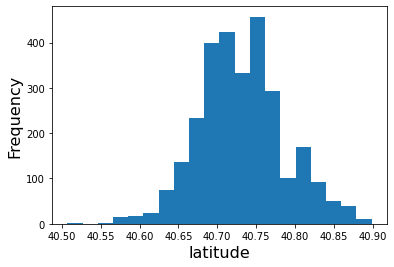

In [ ]:

plt.hist(df['latitude'], bins = 20)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('latitude', fontsize = 16)

Text(0.5, 0, 'longitude')

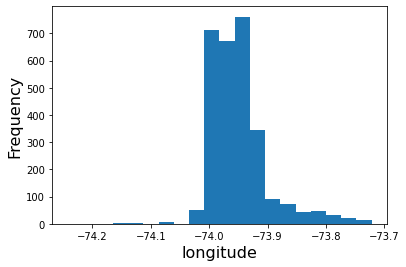

In [ ]:

plt.hist(df['longitude'], bins = 20)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('longitude', fontsize = 16)

Text(0.5, 0, 'cost')

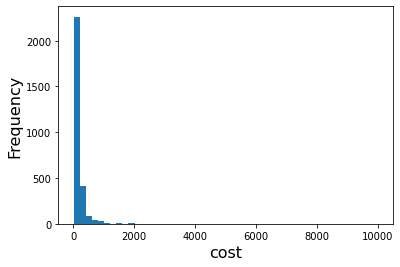

In [ ]:

plt.hist(df['cost'], bins = 50)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('cost', fontsize = 16)


Text(0.5, 0, 'minimum_nights')

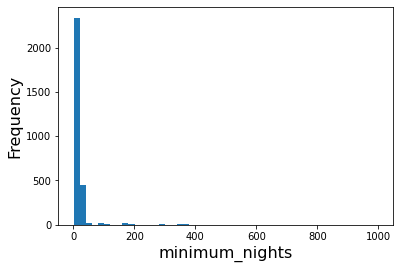

In [ ]:
plt.hist(df['minimum_nights'], bins = 50)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('minimum_nights', fontsize = 16)

Text(0.5, 0, 'number_of_reviews')

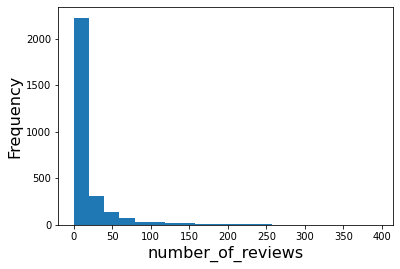

In [ ]:
plt.hist(df['number_of_reviews'], bins = 20)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('number_of_reviews', fontsize = 16)



Text(0.5, 0, 'reviews_per_month')

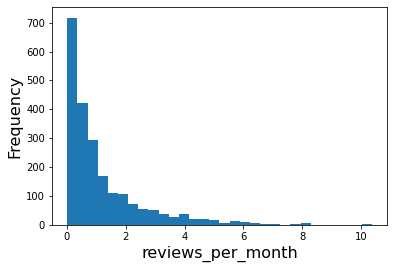

In [ ]:
plt.hist(df['reviews_per_month'], bins = 30)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('reviews_per_month', fontsize = 16)

Text(0.5, 0, 'owned_hotels')

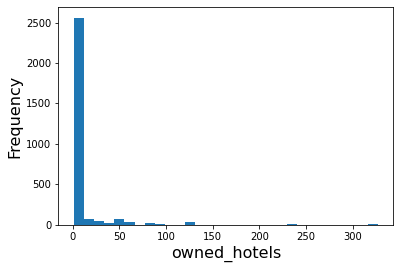

In [ ]:
plt.hist(df['owned_hotels'], bins = 30)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('owned_hotels', fontsize = 16)

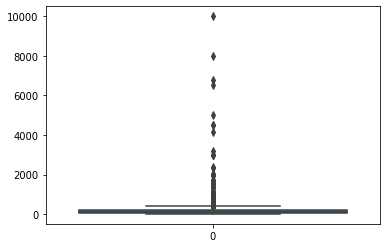

In [ ]:
sns.boxplot(data=df['cost'])

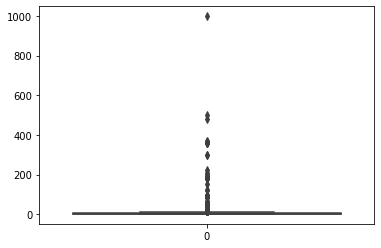

In [ ]:
sns.boxplot(data=df['minimum_nights'])

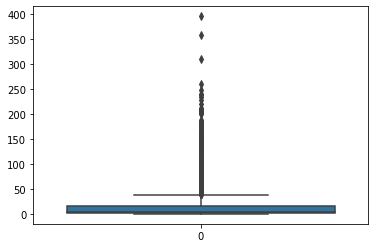

In [ ]:
sns.boxplot(data=df['number_of_reviews'])

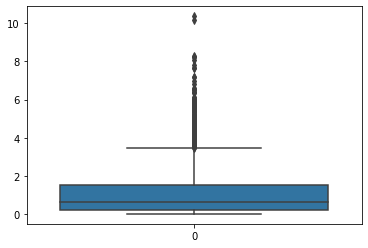

In [ ]:
sns.boxplot(data=df['reviews_per_month'])

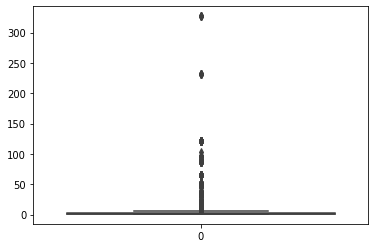

In [ ]:
sns.boxplot(data=df['owned_hotels']) 

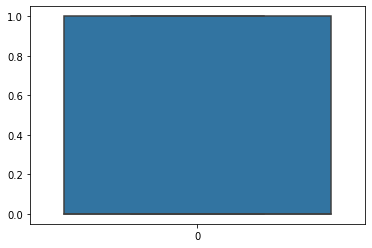

In [ ]:
sns.boxplot(data=df['yearly_availability']) 

**Correlation Matrix between Numerical Attributes also tell important infomration about the given process.**

In [ ]:
import pandas as pd
import numpy as np
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
id,1.00,-0.02,0.06,-0.04,-0.08,-0.33,0.29,0.52,0.03,-0.16
latitude,-0.02,1.00,0.05,0.01,0.01,0.01,0.04,-0.01,0.06,-0.03
longitude,0.06,0.05,1.00,-0.14,-0.07,0.01,0.06,0.14,-0.14,0.12
cost,-0.04,0.01,-0.14,1.00,0.05,-0.07,-0.13,-0.05,0.03,0.15
minimum_nights,-0.08,0.01,-0.07,0.05,1.00,-0.09,-0.13,-0.02,0.11,0.17
number_of_reviews,-0.33,0.01,0.01,-0.07,-0.09,1.00,0.53,-0.16,-0.11,-0.19
reviews_per_month,0.29,0.04,0.06,-0.13,-0.13,0.53,1.00,0.19,-0.13,-0.25
owner_id,0.52,-0.01,0.14,-0.05,-0.02,-0.16,0.19,1.00,0.07,0.12
owned_hotels,0.03,0.06,-0.14,0.03,0.11,-0.11,-0.13,0.07,1.00,0.19
yearly_availability,-0.16,-0.03,0.12,0.15,0.17,-0.19,-0.25,0.12,0.19,1.00


# **Question 3: Data Wrangling - Duplicate Transactions, Data Quality Analysis**

**Till know I didn't remove any empty Columns. Before removing any attribute always check with Clients or Business Teams to get the core sense of that attribute and if you can acquire that or generate that with an online help or API. If nothing works out that way then only think of removing it. Because a single attribute can have a big impact overall**

In [ ]:
df.head(5)

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [ ]:
df_2 =df.copy()

# **Question 4: Model, Classification, Removing Outliers, Further Cleaning, Feature Encoding, Feature Engineering, Metrics, Evaluation, Results, Further Improvement and Domains**



**Interquartile Ranges are generally used for removing the outliers in a numerical attribute**

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
#df = remove_outlier(df, 'cost' )

In [ ]:
#df = remove_outlier(df, 'minimum_nights' )

In [ ]:
#df = remove_outlier(df, 'number_of_reviews' )

In [ ]:
#df = remove_outlier(df, 'reviews_per_month' )

In [ ]:
#df = remove_outlier(df, 'owned_hotels' )

**We can see which buckets are removed from the dataset, as for Models to generalize the dataset well it is advised to remove outliers. But in some use cases we avoid that as well**

Text(0.5, 0, 'cost')

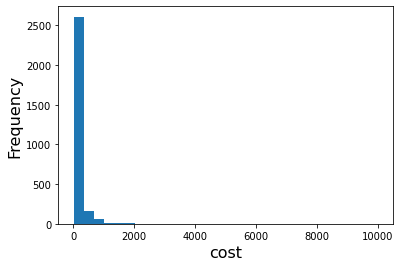

In [ ]:
plt.hist(df['cost'], bins = 30)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('cost', fontsize = 16)

Text(0.5, 0, 'minimum_nights')

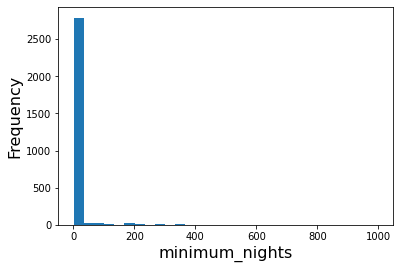

In [ ]:
plt.hist(df['minimum_nights'], bins = 30)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('minimum_nights', fontsize = 16)

Text(0.5, 0, 'number_of_reviews')

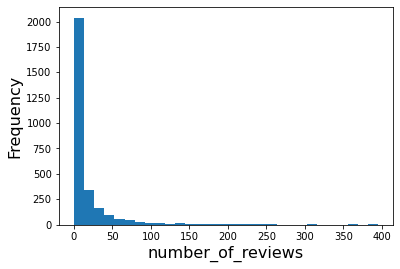

In [ ]:


plt.hist(df['number_of_reviews'], bins = 30)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('number_of_reviews', fontsize = 16)

Text(0.5, 0, 'reviews_per_month')

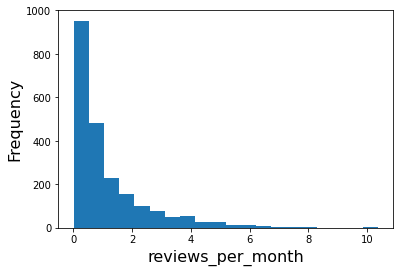

In [ ]:

plt.hist(df['reviews_per_month'], bins = 20)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('reviews_per_month', fontsize = 16)



Text(0.5, 0, 'owned_hotels')

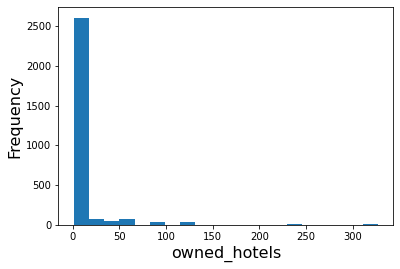

In [ ]:

plt.hist(df['owned_hotels'], bins = 20)
plt.ylabel('Frequency', fontsize = 16)
plt.xlabel('owned_hotels', fontsize = 16)



In [ ]:
df.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [ ]:
df.shape

(2870, 12)

In [ ]:
df = df.drop(columns=['id','owner_id'])
print('Final total columns: ', len(df.columns))

Final total columns:  10


In [ ]:
df.head()

,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owned_hotels,yearly_availability
0,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,1,0
1,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,1,0
2,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,1,1
3,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,65,1
4,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,3,1


In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
columns = ['region', 'accommodation_type', ]
for i in columns:
    df[i] = le.fit_transform(df[i])

In [ ]:
for i in df.columns:
    df[i] = df[i].fillna(df[i].mode()[0])

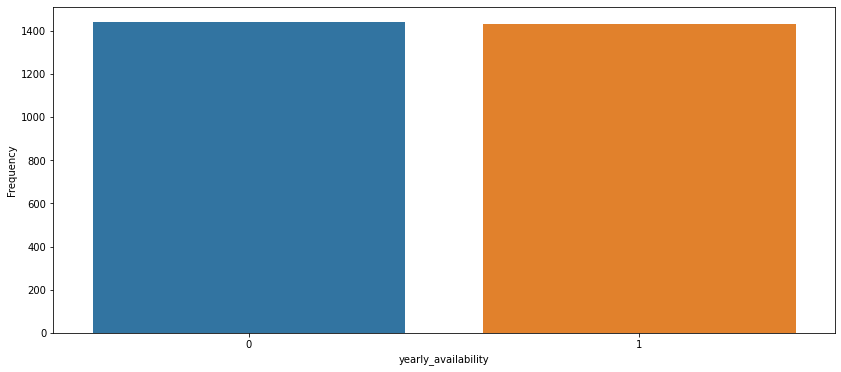

In [ ]:
e=pd.DataFrame(df.yearly_availability.value_counts()).reset_index(drop=False)
e.columns=['yearly_availability','Frequency'] # rename columns
plt.figure(figsize=(14,6)) # adjust figure size
ax = sns.barplot(x="yearly_availability", y="Frequency", data=e) # draw barplot

In [ ]:
from imblearn.under_sampling import RandomUnderSampler


y = df['yearly_availability']
X = df.drop(columns = ['yearly_availability'])
RUS = RandomUnderSampler()
X, y = RUS.fit_resample(X, y)
print(len(X), len(y))

2862 2862


In [ ]:
y = df['yearly_availability']
X = df.drop(columns = ['yearly_availability'])

**For Model Evaluation Always Train the model on Training dataset and Verify the evaluation metrics on test data sets.**

**Sometimes validation set is made to optimize the hyper-parameters separately**

In [ ]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

2296 574
2296 574


**Class for Training and Evaluation:**

In [ ]:
class TrainAndEval:

  def __init__(self, clf, X_train, y_train, X_test, y_test):
    self.clf = clf
    self.X_train = X_train
    self.y_train = y_train
    self.X_test = X_test
    self.y_test = y_test

  def train(self):
    return self.clf.fit(self.X_train, self.y_train)

  def eval(self):
    y_pred = self.clf.predict(self.X_test)
    tn, fp, fn, tp = confusion_matrix(self.y_test,y_pred).ravel()
    print('True Negatives:', tn)
    print('False Positives:', fp)
    print('False Negatives:', fn)
    print('True Positives:', tp)
    print(classification_report(self.y_test,y_pred))

**Reason for choosing Classifiers and Particularly Tree Structures:**



*   **Whenever you have a given label to model around, classification is the best choice. Clustering can also be done where labels are not required to get other meaningful insights out of data.**

*   **Tree Based Classifiers are best in terms of interpretation of the end results. Because in real world scenarios, detecting fraud is just one part. But what actions to take to handle and optimize the processes, these tree structures help through the attributes hierarchy that which actions can be taken and some buckets can be made to start with.**

*   **Simple SVM and Logistic regression are always the best baselines to compare-with**


*   **Neural Networks are not used for simplicity and not getting into black boxed domain as interpretations of the results become harder.**


*   **Else, a multi-layer perceptron could also be trained, would not recommend CNN or RNN for this use case. Though some people use RNNs for contexutal understanding in the fraud behavior.**





# **Gradient Boosting Classifier:**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
params = {'n_estimators': [10, 50, 125, 500], 'max_depth': [1, 3, 5], 
          'learning_rate': [0.05, 0.1, 0.5, 0.9]}
grid = GridSearchCV(estimator=GradientBoostingClassifier(random_state = 0), param_grid=params, cv=5, verbose=3)
grid = grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.828 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.786 total time=   0.1s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.802 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.802 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.819 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.917 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.786 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.802 total time=   0.2s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.802 total time=   0.1s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.819 total t

In [ ]:
clf = grid.best_estimator_
GBT = TrainAndEval(clf, X_train, y_train, X_test, y_test)
GBT.eval()

True Negatives: 260
False Positives: 19
False Negatives: 23
True Positives: 272
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       279
           1       0.93      0.92      0.93       295

    accuracy                           0.93       574
   macro avg       0.93      0.93      0.93       574
weighted avg       0.93      0.93      0.93       574



In [ ]:
df_test = pd.read_csv('/content/test.csv')


In [ ]:
df_test = df_test.drop(columns=['id', 'owner_id'])
print('Final total columns: ', len(df_test.columns))

Final total columns:  9


In [ ]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
columns = ['region', 'accommodation_type', ]
for i in columns:
    df_test[i] = le.fit_transform(df_test[i])


In [ ]:
len(df_test)

718

In [ ]:
for i in df_test.columns:
    df_test[i] = df_test[i].fillna(df_test[i].mode()[0])

In [ ]:
len(clf.predict(df_test))

718

**We can see that Gradient Boosting Classifier gave good results:**


*   **F1 Score = 72%**
*   **Precision = 75%**
*   **Recall = 70%**




# **Grid XGBoost**

In [ ]:


params = {'n_estimators': [10, 50, 125, 500], 'max_depth': [1, 3, 5], 
          'learning_rate': [0.05, 0.1, 0.5,  0.9]
        }

gridXGB = GridSearchCV(estimator=XGBClassifier(), param_grid=params, cv=5, verbose=3)
gridXGB = gridXGB.fit(X_train, y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.828 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.786 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.802 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.802 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=10;, score=0.819 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.828 total time=   0.0s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.786 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.802 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.802 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=50;, score=0.819 total t

In [ ]:
gridXGB = gridXGB.best_estimator_
XGB = TrainAndEval(gridXGB, X_train, y_train, X_test, y_test)
XGB.eval()

True Negatives: 259
False Positives: 20
False Negatives: 15
True Positives: 280
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       279
           1       0.93      0.95      0.94       295

    accuracy                           0.94       574
   macro avg       0.94      0.94      0.94       574
weighted avg       0.94      0.94      0.94       574



**We can see that Grid XGBoost Classifier gave better results than the last one:**


*   **F1 Score = 73%**
*   **Precision = 75%**
*   **Recall = 70%**

# **SVM**

In [ ]:
params = {
    'C': [0.05, 0.1, 0.5, 1, 10, 50, 100],
    'kernel': ['poly', 'rbf'],
    'degree': [1, 2, 3, 4]
}

gridSVM = GridSearchCV(estimator=SVC(), param_grid=params, cv=5, verbose=3)
gridSVM = gridSVM.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV 1/5] END .....C=0.05, degree=1, kernel=poly;, score=0.515 total time=   7.5s
[CV 2/5] END .....C=0.05, degree=1, kernel=poly;, score=0.517 total time=   7.6s
[CV 3/5] END .....C=0.05, degree=1, kernel=poly;, score=0.501 total time=   8.0s
[CV 4/5] END .....C=0.05, degree=1, kernel=poly;, score=0.511 total time=   7.7s
[CV 5/5] END .....C=0.05, degree=1, kernel=poly;, score=0.498 total time=   7.5s
[CV 1/5] END ......C=0.05, degree=1, kernel=rbf;, score=0.522 total time=  12.0s
[CV 2/5] END ......C=0.05, degree=1, kernel=rbf;, score=0.522 total time=  11.9s
[CV 3/5] END ......C=0.05, degree=1, kernel=rbf;, score=0.505 total time=  12.1s
[CV 4/5] END ......C=0.05, degree=1, kernel=rbf;, score=0.516 total time=  12.0s
[CV 5/5] END ......C=0.05, degree=1, kernel=rbf;, score=0.505 total time=  12.3s
[CV 1/5] END .....C=0.05, degree=2, kernel=poly;, score=0.517 total time=   7.7s
[CV 2/5] END .....C=0.05, degree=2, kernel=poly

In [ ]:
gridSVM = gridSVM.best_estimator_
SVM = TrainAndEval(gridSVM, X_train, y_train, X_test, y_test)
SVM.eval()

True Negatives: 1277
False Positives: 443
False Negatives: 856
True Positives: 963
              precision    recall  f1-score   support

           0       0.60      0.74      0.66      1720
           1       0.68      0.53      0.60      1819

    accuracy                           0.63      3539
   macro avg       0.64      0.64      0.63      3539
weighted avg       0.64      0.63      0.63      3539



**The Results of Grid SVM Classifier:**


*   **F1 Score = 60%**
*   **Precision = 68%**
*   **Recall = 53%**

**The reason Random Forest is used but not simple Decision Tree becasue decision trees tend to over-fit quickly.**

# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
params = {
    'n_estimators': [10, 50, 100, 300, 500],
    'max_depth': [1, 3, 5],
    'bootstrap': [True, False],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

gridRF = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5, verbose=3)
gridRF = gridRF.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.635 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.636 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.629 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.635 total time=   0.1s
[CV 5/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=10;, score=0.605 total time=   0.1s
[CV 1/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.643 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50;, score=0.642 total time=   0.2s
[CV 3/5] END

In [ ]:
gridRF = gridRF.best_estimator_
RF = TrainAndEval(gridRF, X_train, y_train, X_test, y_test)
RF.eval()

True Negatives: 1232
False Positives: 488
False Negatives: 667
True Positives: 1152
              precision    recall  f1-score   support

           0       0.65      0.72      0.68      1720
           1       0.70      0.63      0.67      1819

    accuracy                           0.67      3539
   macro avg       0.68      0.67      0.67      3539
weighted avg       0.68      0.67      0.67      3539



**The Results of Random Forest Classifier:**


*   **F1 Score = 67%**
*   **Precision = 70%**
*   **Recall = 63%**

# **Logistic Regression**

In [ ]:
params = {
    'penalty': ['l2', 'none'],
    'C': [0.005, 0.01, 0.1, 0.5, 1, 10],
    'fit_intercept': [True, False],
    'n_jobs': [-1]
}

gridLR = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=params, cv=5, verbose=3)
gridLR = gridLR.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.623 total time=   1.9s
[CV 2/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.627 total time=   0.7s
[CV 3/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.631 total time=   0.5s
[CV 4/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.636 total time=   0.3s
[CV 5/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.616 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.632 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.636 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=0.005, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.619 total time=   0.4s
[CV 1/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.623 total time=   0.4s
[CV 2/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.623 total time=   0.3s
[CV 3/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.631 total time=   0.4s
[CV 4/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.637 total time=   0.5s
[CV 5/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.615 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.623 total time=   0.3s
[CV 3/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.623 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.637 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=0.005, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.619 total time=   0.4s
[CV 1/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.623 total time=   0.3s
[CV 2/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.627 total time=   0.4s
[CV 3/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.628 total time=   0.3s
[CV 4/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.637 total time=   0.4s
[CV 5/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.619 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.632 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.636 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=0.01, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.619 total time=   0.5s
[CV 1/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.622 total time=   0.4s
[CV 2/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.623 total time=   0.3s
[CV 3/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.623 total time=   0.3s
[CV 4/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.637 total time=   0.4s
[CV 5/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.620 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.624 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.623 total time=   0.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.623 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.637 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=0.01, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.619 total time=   0.4s
[CV 1/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.622 total time=   0.3s
[CV 2/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.630 total time=   0.4s
[CV 3/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.632 total time=   0.5s
[CV 4/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.636 total time=   0.3s
[CV 5/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.616 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.632 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.636 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=0.1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.619 total time=   0.5s
[CV 1/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.624 total time=   0.5s
[CV 2/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.630 total time=   0.5s
[CV 3/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.623 total time=   0.3s
[CV 4/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.636 total time=   0.3s
[CV 5/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.615 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.623 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.623 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.637 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=0.1, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.619 total time=   0.4s
[CV 1/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.624 total time=   0.3s
[CV 2/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.629 total time=   0.4s
[CV 3/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.632 total time=   0.4s
[CV 4/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.636 total time=   0.4s
[CV 5/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.619 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.632 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.636 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=0.5, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.619 total time=   0.4s
[CV 1/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.624 total time=   0.4s
[CV 2/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.623 total time=   0.2s
[CV 3/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.623 total time=   0.3s
[CV 4/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.636 total time=   0.4s
[CV 5/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.619 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.623 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.623 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.637 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=0.5, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.619 total time=   0.4s
[CV 1/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.624 total time=   0.5s
[CV 2/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.636 total time=   0.7s
[CV 3/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.632 total time=   0.4s
[CV 4/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.636 total time=   0.4s
[CV 5/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=l2;, score=0.616 total time=   0.2s
[CV 1/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s
[CV 2/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s
[CV 3/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.632 total time=   0.4s
[CV 4/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.636 total time=   0.5s
[CV 5/5] END C=1, fit_intercept=True, n_jobs=-1, penalty=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.624 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.632 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.636 total time=   0.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=10, fit_intercept=True, n_jobs=-1, penalty=none;, score=0.619 total time=   0.5s
[CV 1/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.622 total time=   0.4s
[CV 2/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.629 total time=   0.5s
[CV 3/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.623 total time=   0.3s
[CV 4/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.636 total time=   0.3s
[CV 5/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=l2;, score=0.619 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 1/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.624 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 2/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.623 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 3/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.623 total time=   0.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 4/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.637 total time=   0.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"


[CV 5/5] END C=10, fit_intercept=False, n_jobs=-1, penalty=none;, score=0.619 total time=   0.3s


In [ ]:
gridLR = gridLR.best_estimator_
LR = TrainAndEval(gridLR, X_train, y_train, X_test, y_test)
LR.eval()

True Negatives: 1216
False Positives: 504
False Negatives: 779
True Positives: 1040
              precision    recall  f1-score   support

           0       0.61      0.71      0.65      1720
           1       0.67      0.57      0.62      1819

    accuracy                           0.64      3539
   macro avg       0.64      0.64      0.64      3539
weighted avg       0.64      0.64      0.64      3539



**The Results of Logisitc Regression Classifier:**


*   **F1 Score = 62%**
*   **Precision = 67%**
*   **Recall = 57%**

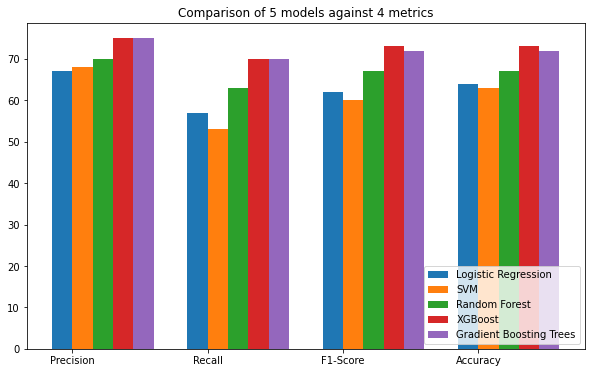

In [ ]:
XAxis = ['Precision', 'Recall', 'F1-Score', 'Accuracy']
LRValues = [67,57,62,64]
SVMValues = [68, 53, 60, 63]
RFValues = [70, 63, 67, 67]
XGBValues = [75, 70, 73, 73]
GBTValues = [75, 70, 72, 72]

bar_width = 0.15
index = np.arange(4)

fig, ax = plt.subplots()
LR = ax.bar(index,LRValues, width=bar_width, label = "Logistic Regression") 
SVM = ax.bar(index+bar_width,SVMValues, width=bar_width, label = "SVM") 
RF = ax.bar(index+bar_width+bar_width,RFValues, width=bar_width, label = "Random Forest") 
XGB = ax.bar(index+bar_width+bar_width+bar_width,XGBValues, width=bar_width, label = "XGBoost") 
GBT = ax.bar(index+bar_width+bar_width+bar_width+bar_width,GBTValues, width=bar_width, label = "Gradient Boosting Trees") 


ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('Comparison of 5 models against 4 metrics')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(XAxis)
ax.legend(loc = 'lower right')

fig.set_size_inches(10,6)

plt.show()

fig.savefig('MetricsModels.png',dpi = 200)

**It can clearly be seen that XGBoost and Gradient Boosting Trees outperformed all the other classifiers:**

**Where F1 Score and Accuracy of XGBoost is highest = 73% and Precision of 75% to detect frauds**

# **Further Improvements and Remarks:**



*   **Other than classification, Clustering can also help significantly in analyzing the dataset. The best methods can be hierarchical clustering (agglomerative vs divisive). Isolation Forest can also be tried.**


*  **In the data set we had clearly seen that there were some Customer IDs which were highly fraudulent. So, a user-profiling based statistical model would significantly improve the results.**



*   **Over Sampling could also be tried and compare the results between the under sample strategy in the given use case.**


*   **Principal Component Analysis can also be tried to reduce dimensions and still maintaing the variance and compare results** 



*   **Nothing beats the quality of data. So running test-statistics could also help in analyzing the data further.**

*   **Important data acquisition ( either by client, business teams or an external API) and rigorous feature engineering.**



*   **Better way to fill the missing values in columns, based on the distribution of the data column**


*   **Better way to handle outliers. In case of large number of records people use Auto-encoders as well.**



*   **Exploring neural networks side for modeling and particularly Recrrent Neural Networks to see if there can be built context between next and previous fraudulent transactions.**


*   **Discussing with other team members and doing simulation based customer behavioral analysis to understand the processes further that, if any important attribute can be added**

*   **Checking for data quality in terms of days like Cyber-Monday or Thanksgiving or any sales.**



*   **Time series based anomaly detection in the dataset and then modeling it appropriately**



*   **More business knowledge to incorporate that information inside the models**

*   **Analyzing False Negative, True Negative, True Positive and False Positive carefully to further enhance and fine-tune the used models.**













